In [1]:
#References Used 
# https://datascienceplus.com/linear-regression-from-scratch-in-python/
# https://stackoverflow.com/questions/45648668/convert-numpy-array-to-0-or-1 

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import string

### Linear Regression Implementation

In [177]:
diabetes = load_diabetes() #Loading the diabetes dataset
data = diabetes.data 
target = diabetes.target
featureLength = len(diabetes.feature_names)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2) #Splitting the dataset into train & test

In [179]:
print("X_train : " , X_train.shape, " |  y_train : " , y_train.shape)

X_train :  (353, 10)  |  y_train :  (353,)


In [180]:
print("X_test : " , X_test.shape, " |  y_test : " , y_test.shape)

X_test :  (89, 10)  |  y_test :  (89,)


In [181]:
xi_vals = X_train[:,0] #First column of the dataset
yi_vals = y_train #Target Values 

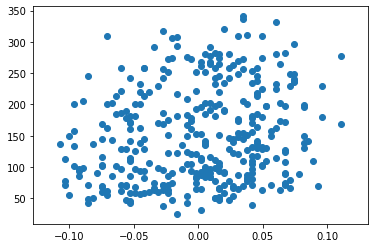

In [182]:
plt.scatter(X_train[:,0],yi_vals) #Scatter plot of targets against the dataset

In [183]:
ones = np.ones(shape=y_train.shape)[..., None] #Creating an array of 1's
X = np.concatenate((ones, X_train), 1) #Concatenating the array of 1's to the X values

In [184]:
XTX = X.T @ X #The coefficient matrix of Normal Eq's
XTy = X.T @ yi_vals #Right hand side of Normal Eq's

In [185]:
XTX

array([[ 3.53000000e+02,  2.11089932e-01,  2.55557194e-01,
        -8.66070771e-01, -3.17014133e-01, -5.43719290e-02,
        -4.46495153e-02, -8.77221008e-02,  3.09310705e-01,
        -1.66890640e-01, -4.01137752e-01],
       [ 2.11089932e-01,  8.27374339e-01,  1.25950136e-01,
         1.63446257e-01,  2.57115315e-01,  2.22633236e-01,
         1.90544009e-01, -5.23536469e-02,  1.65441669e-01,
         2.21805446e-01,  2.44856548e-01],
       [ 2.55557194e-01,  1.25950136e-01,  8.00185712e-01,
         5.64027166e-02,  1.89934502e-01,  1.90101640e-02,
         1.04411747e-01, -3.09986433e-01,  2.65332679e-01,
         1.30335809e-01,  1.64504793e-01],
       [-8.66070771e-01,  1.63446257e-01,  5.64027166e-02,
         7.46556718e-01,  2.84865529e-01,  2.04093221e-01,
         2.17194220e-01, -2.89679543e-01,  3.31448698e-01,
         3.44380204e-01,  2.84395852e-01],
       [-3.17014133e-01,  2.57115315e-01,  1.89934502e-01,
         2.84865529e-01,  7.72485067e-01,  1.94078436e-01,
  

In [186]:
XTy

array([53260.        ,   286.81077169,    75.01520214,   566.87553825,
         473.64598243,   281.94531723,   234.81560966,  -517.95291369,
         609.86428038,   697.81255651,   415.2700775 ])

In [187]:
beta = np.linalg.solve(XTX,XTy) #Solving for beta

In [188]:
beta #Predicted beta values 

array([ 152.84244356,    5.50319427, -263.05195113,  506.95149425,
        303.01503495, -646.97016119,  366.90598652,   26.93844082,
        140.85865496,  681.05326827,   96.08401706])

In [193]:
def get_predictions(beta_values, x_values):
    beta_0 = beta[0]
    length = len(beta_values)
    result = beta_0 
    for i in range(1,length):
        result += beta[i]*xi_vals
        
    return result

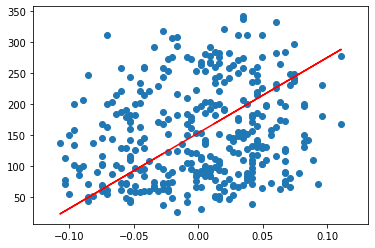

In [196]:
y_pred = get_predictions(beta,X_test) #Using the test set to make new predictions
plt.scatter(xi_vals,yi_vals) 
plt.plot(xi_vals, y_pred, color = 'red')

### Logistic Regression (Classification) Implementation

In [321]:
data_dir = '/Users/ksivanathan/Desktop/USF/Stat_Learning/Project1_MATH373/'
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
y = df_train['Survived'].values
df_out = pd.DataFrame(df_test['PassengerId'])

In [322]:
#Code taken from previous homework
median_age = df_train['Age'].median()
mean_fare = df_train['Fare'].mean()

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if (str.find(big_string, substring) != -1):
            return substring
    print(big_string)
    return np.nan


def replace_titles(x):
    
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
def preprocess(df): 
    df = df[['Age','Pclass','Sex','SibSp','Parch','Fare','Name','Embarked']] 
    
    #Filling null values by imputing them
    df['Age'].fillna(median_age, inplace = True)
    df['Fare'].fillna(mean_fare, inplace = True)
    
    #Replacing titles with Mr, Mrs, Miss & Master
    df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
    df['Title']=df.apply(replace_titles, axis=1)
    
    df['Family_Size']=df['SibSp']+df['Parch']
    
    df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)
    
    #One-Hot-Encoding the Pclass feature 
    one_hot_Class = pd.get_dummies(df['Pclass'])
    df = df.drop(['Pclass'], axis = 1)
    df = df.join(one_hot_Class)
    
    #One-Hot-Encoding the Sex feature 
    one_hot_gender = pd.get_dummies(df['Sex'])
    df = df.drop(['Sex'], axis = 1)
    df['female'] = one_hot_gender['female']
    
    #One-Hot-Encoding the Embarked feature 
    one_hot_embark = pd.get_dummies(df['Embarked'])
    df = df.drop(['Embarked'], axis = 1)
    df = df.join(one_hot_embark)
    
    #One-Hot-Encoding the Title
    one_hot_title = pd.get_dummies(df['Title'])
    df = df.drop(['Title'], axis = 1)
    df = df.join(one_hot_title)
    
    df = df.drop(['Name'], axis=1)
    
    return df

In [323]:
df_train = preprocess(df_train)
df_test = preprocess(df_test)

/Users/ksivanathan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/ksivanathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ksivanathan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [324]:
sc = StandardScaler() #Scaling the data
df_train = sc.fit_transform(df_train)
df_test = sc.transform(df_test)

In [325]:
ones_train = np.ones(shape=y.shape)[..., None] #A column of ones
X = np.concatenate((ones_train, df_train), 1) #Concatenating the column of 1's to the X values to get the design matrix
y = y[:, np.newaxis]

ones_test = np.ones(shape = df_test.shape[0])[...,None]
X_validation = np.concatenate((ones_test, df_test), 1)

In [326]:
beta = np.random.randn(X.shape[1])

#### Binary Classification Implementation

In [327]:
def sigmoid(u): #Sigmoid Function
    sig = 1 / (1 + np.exp(-u))
    return sig

In [328]:
def cross_entropy(p,q): #Cross Entropy Loss Function
    ce = -p*np.log(q)- ((1-p)*np.log(1-q))
    return ce    

In [329]:
def f(X,beta): #Prediction Function
    result = sigmoid(np.dot(X,beta)) 
    return result

In [330]:
def L(X,y,beta): #Objective / Loss Function
    N = X.shape[0]
    result = 0 
    q = sigmoid(f(X,beta))
    
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        
        result += cross_entropy(yi,q)
    
    result = sum(result)/N
    return result

In [331]:
def grad_L(X,y,beta): #Gradient Calculation at L 
    N = X.shape[0]
    gradient = 0
    
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        
        grad_i = (sigmoid(xiHat.T @ beta)-yi)*xiHat.T
        gradient += grad_i
        
    return gradient / N

In [374]:
def minimize_grad_L(X,y): #Gradient Descent 
    alpha = 0.05
    num_iters = 1000
    L_vals = np.zeros(num_iters)
    beta_t = np.zeros(X.shape[1])
    
    for i in range(num_iters):
        L_vals[i] = L(X,y,beta_t)
        print('Iteration :', i ,"| Objective Function Value : ", L_vals[i])
        
        beta_t = beta_t - alpha * grad_L(X,y,beta_t)
        
    return beta_t, L_vals

#### Using the Training Dataset

In [375]:
beta_est, L_vals = minimize_grad_L(X,y) 

Iteration : 0 | Objective Function Value :  696.9025929044702
Iteration : 1 | Objective Function Value :  696.6089337747769
Iteration : 2 | Objective Function Value :  696.3461552229792
Iteration : 3 | Objective Function Value :  696.1099412942463
Iteration : 4 | Objective Function Value :  695.8964929019689
Iteration : 5 | Objective Function Value :  695.7025214459975
Iteration : 6 | Objective Function Value :  695.5252138095019
Iteration : 7 | Objective Function Value :  695.3621823540956
Iteration : 8 | Objective Function Value :  695.211409882416
Iteration : 9 | Objective Function Value :  695.0711958536912
Iteration : 10 | Objective Function Value :  694.9401072216274
Iteration : 11 | Objective Function Value :  694.816935288318
Iteration : 12 | Objective Function Value :  694.700658788029
Iteration : 13 | Objective Function Value :  694.5904127969311
Iteration : 14 | Objective Function Value :  694.4854627985145
Iteration : 15 | Objective Function Value :  694.3851831666416
Itera

Iteration : 135 | Objective Function Value :  688.7932618985185
Iteration : 136 | Objective Function Value :  688.766616979608
Iteration : 137 | Objective Function Value :  688.7401763521284
Iteration : 138 | Objective Function Value :  688.7139382801394
Iteration : 139 | Objective Function Value :  688.6879010428974
Iteration : 140 | Objective Function Value :  688.6620629347755
Iteration : 141 | Objective Function Value :  688.6364222651944
Iteration : 142 | Objective Function Value :  688.6109773585305
Iteration : 143 | Objective Function Value :  688.5857265540529
Iteration : 144 | Objective Function Value :  688.5606682058136
Iteration : 145 | Objective Function Value :  688.5358006825783
Iteration : 146 | Objective Function Value :  688.5111223677259
Iteration : 147 | Objective Function Value :  688.486631659167
Iteration : 148 | Objective Function Value :  688.4623269692377
Iteration : 149 | Objective Function Value :  688.4382067246191
Iteration : 150 | Objective Function Value

Iteration : 269 | Objective Function Value :  686.5251202409391
Iteration : 270 | Objective Function Value :  686.5150835235657
Iteration : 271 | Objective Function Value :  686.5051160289015
Iteration : 272 | Objective Function Value :  686.4952172331875
Iteration : 273 | Objective Function Value :  686.4853866170272
Iteration : 274 | Objective Function Value :  686.4756236653474
Iteration : 275 | Objective Function Value :  686.4659278673596
Iteration : 276 | Objective Function Value :  686.4562987165112
Iteration : 277 | Objective Function Value :  686.4467357104577
Iteration : 278 | Objective Function Value :  686.437238351015
Iteration : 279 | Objective Function Value :  686.4278061441272
Iteration : 280 | Objective Function Value :  686.4184385998211
Iteration : 281 | Objective Function Value :  686.4091352321724
Iteration : 282 | Objective Function Value :  686.3998955592674
Iteration : 283 | Objective Function Value :  686.390719103171
Iteration : 284 | Objective Function Value

Iteration : 404 | Objective Function Value :  685.6325276434401
Iteration : 405 | Objective Function Value :  685.6284279454878
Iteration : 406 | Objective Function Value :  685.6243542319141
Iteration : 407 | Objective Function Value :  685.6203063226403
Iteration : 408 | Objective Function Value :  685.6162840389361
Iteration : 409 | Objective Function Value :  685.6122872034153
Iteration : 410 | Objective Function Value :  685.608315640023
Iteration : 411 | Objective Function Value :  685.6043691740235
Iteration : 412 | Objective Function Value :  685.6004476319937
Iteration : 413 | Objective Function Value :  685.5965508418051
Iteration : 414 | Objective Function Value :  685.5926786326196
Iteration : 415 | Objective Function Value :  685.5888308348807
Iteration : 416 | Objective Function Value :  685.5850072802932
Iteration : 417 | Objective Function Value :  685.581207801827
Iteration : 418 | Objective Function Value :  685.5774322336955
Iteration : 419 | Objective Function Value

Iteration : 537 | Objective Function Value :  685.260223966679
Iteration : 538 | Objective Function Value :  685.2584070523691
Iteration : 539 | Objective Function Value :  685.2566008016622
Iteration : 540 | Objective Function Value :  685.2548051460487
Iteration : 541 | Objective Function Value :  685.2530200174898
Iteration : 542 | Objective Function Value :  685.2512453484209
Iteration : 543 | Objective Function Value :  685.249481071751
Iteration : 544 | Objective Function Value :  685.2477271208542
Iteration : 545 | Objective Function Value :  685.2459834295703
Iteration : 546 | Objective Function Value :  685.2442499322001
Iteration : 547 | Objective Function Value :  685.2425265635019
Iteration : 548 | Objective Function Value :  685.2408132586812
Iteration : 549 | Objective Function Value :  685.2391099534038
Iteration : 550 | Objective Function Value :  685.2374165837706
Iteration : 551 | Objective Function Value :  685.2357330863376
Iteration : 552 | Objective Function Value

Iteration : 670 | Objective Function Value :  685.0908903271405
Iteration : 671 | Objective Function Value :  685.0900366091398
Iteration : 672 | Objective Function Value :  685.0891875562286
Iteration : 673 | Objective Function Value :  685.0883431405496
Iteration : 674 | Objective Function Value :  685.0875033344294
Iteration : 675 | Objective Function Value :  685.0866681103709
Iteration : 676 | Objective Function Value :  685.085837441057
Iteration : 677 | Objective Function Value :  685.0850112993502
Iteration : 678 | Objective Function Value :  685.084189658286
Iteration : 679 | Objective Function Value :  685.0833724910799
Iteration : 680 | Objective Function Value :  685.0825597711183
Iteration : 681 | Objective Function Value :  685.0817514719598
Iteration : 682 | Objective Function Value :  685.0809475673374
Iteration : 683 | Objective Function Value :  685.0801480311513
Iteration : 684 | Objective Function Value :  685.0793528374743
Iteration : 685 | Objective Function Value

Iteration : 803 | Objective Function Value :  685.0095276785314
Iteration : 804 | Objective Function Value :  685.0091062318273
Iteration : 805 | Objective Function Value :  685.0086869490916
Iteration : 806 | Objective Function Value :  685.0082698183267
Iteration : 807 | Objective Function Value :  685.0078548276003
Iteration : 808 | Objective Function Value :  685.0074419650568
Iteration : 809 | Objective Function Value :  685.007031218911
Iteration : 810 | Objective Function Value :  685.0066225774502
Iteration : 811 | Objective Function Value :  685.0062160290333
Iteration : 812 | Objective Function Value :  685.0058115620909
Iteration : 813 | Objective Function Value :  685.0054091651208
Iteration : 814 | Objective Function Value :  685.0050088266967
Iteration : 815 | Objective Function Value :  685.0046105354575
Iteration : 816 | Objective Function Value :  685.0042142801097
Iteration : 817 | Objective Function Value :  685.0038200494321
Iteration : 818 | Objective Function Valu

Iteration : 936 | Objective Function Value :  684.9686481378562
Iteration : 937 | Objective Function Value :  684.9684321542671
Iteration : 938 | Objective Function Value :  684.9682172318156
Iteration : 939 | Objective Function Value :  684.9680033650467
Iteration : 940 | Objective Function Value :  684.9677905485377
Iteration : 941 | Objective Function Value :  684.9675787768921
Iteration : 942 | Objective Function Value :  684.9673680447486
Iteration : 943 | Objective Function Value :  684.9671583467756
Iteration : 944 | Objective Function Value :  684.9669496776735
Iteration : 945 | Objective Function Value :  684.9667420321673
Iteration : 946 | Objective Function Value :  684.9665354050169
Iteration : 947 | Objective Function Value :  684.966329791013
Iteration : 948 | Objective Function Value :  684.9661251849718
Iteration : 949 | Objective Function Value :  684.9659215817406
Iteration : 950 | Objective Function Value :  684.9657189761992
Iteration : 951 | Objective Function Valu

Text(0, 0.5, 'Objective Function Value')

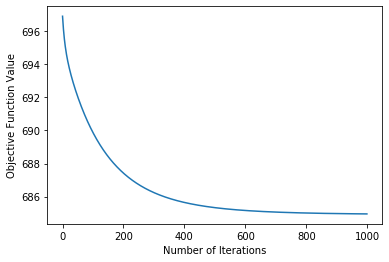

In [376]:
plt.plot(L_vals)
plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function Value')

#### Using the Validation dataset

In [377]:
beta_est_Validation, L_vals_Validation = minimize_grad_L(X_validation,y)

Iteration : 0 | Objective Function Value :  325.6641793872834
Iteration : 1 | Objective Function Value :  325.52175249239446
Iteration : 2 | Objective Function Value :  325.38272011109126
Iteration : 3 | Objective Function Value :  325.2469499063467
Iteration : 4 | Objective Function Value :  325.11431214643835
Iteration : 5 | Objective Function Value :  324.98468061410483
Iteration : 6 | Objective Function Value :  324.8579332854571
Iteration : 7 | Objective Function Value :  324.73395281281665
Iteration : 8 | Objective Function Value :  324.6126268432613
Iteration : 9 | Objective Function Value :  324.49384820174015
Iteration : 10 | Objective Function Value :  324.37751496442274
Iteration : 11 | Objective Function Value :  324.26353044469374
Iteration : 12 | Objective Function Value :  324.15180311108304
Iteration : 13 | Objective Function Value :  324.04224645344937
Iteration : 14 | Objective Function Value :  323.93477881107526
Iteration : 15 | Objective Function Value :  323.82932

Iteration : 132 | Objective Function Value :  317.93391583435346
Iteration : 133 | Objective Function Value :  317.91229698682463
Iteration : 134 | Objective Function Value :  317.8909369960808
Iteration : 135 | Objective Function Value :  317.86983251901245
Iteration : 136 | Objective Function Value :  317.8489802589961
Iteration : 137 | Objective Function Value :  317.828376965195
Iteration : 138 | Objective Function Value :  317.80801943187305
Iteration : 139 | Objective Function Value :  317.78790449771975
Iteration : 140 | Objective Function Value :  317.76802904518695
Iteration : 141 | Objective Function Value :  317.7483899998356
Iteration : 142 | Objective Function Value :  317.72898432969555
Iteration : 143 | Objective Function Value :  317.7098090446331
Iteration : 144 | Objective Function Value :  317.6908611957318
Iteration : 145 | Objective Function Value :  317.672137874682
Iteration : 146 | Objective Function Value :  317.6536362131803
Iteration : 147 | Objective Functio

Iteration : 261 | Objective Function Value :  316.4828626561651
Iteration : 262 | Objective Function Value :  316.47788343775346
Iteration : 263 | Objective Function Value :  316.47295761676935
Iteration : 264 | Objective Function Value :  316.46808458080034
Iteration : 265 | Objective Function Value :  316.46326372495776
Iteration : 266 | Objective Function Value :  316.45849445177475
Iteration : 267 | Objective Function Value :  316.4537761711142
Iteration : 268 | Objective Function Value :  316.4491083000671
Iteration : 269 | Objective Function Value :  316.4444902628601
Iteration : 270 | Objective Function Value :  316.4399214907604
Iteration : 271 | Objective Function Value :  316.43540142198617
Iteration : 272 | Objective Function Value :  316.4309295016121
Iteration : 273 | Objective Function Value :  316.426505181482
Iteration : 274 | Objective Function Value :  316.4221279201184
Iteration : 275 | Objective Function Value :  316.4177971826369
Iteration : 276 | Objective Functio

Iteration : 393 | Objective Function Value :  316.12525232346593
Iteration : 394 | Objective Function Value :  316.123973709493
Iteration : 395 | Objective Function Value :  316.1227076330484
Iteration : 396 | Objective Function Value :  316.12145396351826
Iteration : 397 | Objective Function Value :  316.12021257173024
Iteration : 398 | Objective Function Value :  316.11898332994105
Iteration : 399 | Objective Function Value :  316.11776611181875
Iteration : 400 | Objective Function Value :  316.11656079242323
Iteration : 401 | Objective Function Value :  316.1153672481951
Iteration : 402 | Objective Function Value :  316.11418535693497
Iteration : 403 | Objective Function Value :  316.11301499778904
Iteration : 404 | Objective Function Value :  316.1118560512351
Iteration : 405 | Objective Function Value :  316.1107083990643
Iteration : 406 | Objective Function Value :  316.1095719243674
Iteration : 407 | Objective Function Value :  316.1084465115189
Iteration : 408 | Objective Funct

Iteration : 524 | Objective Function Value :  316.0296300124231
Iteration : 525 | Objective Function Value :  316.0292608174276
Iteration : 526 | Objective Function Value :  316.0288949779931
Iteration : 527 | Objective Function Value :  316.0285324618175
Iteration : 528 | Objective Function Value :  316.0281732369316
Iteration : 529 | Objective Function Value :  316.02781727168934
Iteration : 530 | Objective Function Value :  316.0274645347672
Iteration : 531 | Objective Function Value :  316.0271149951607
Iteration : 532 | Objective Function Value :  316.02676862218016
Iteration : 533 | Objective Function Value :  316.0264253854493
Iteration : 534 | Objective Function Value :  316.02608525489796
Iteration : 535 | Objective Function Value :  316.0257482007635
Iteration : 536 | Objective Function Value :  316.0254141935836
Iteration : 537 | Objective Function Value :  316.02508320419514
Iteration : 538 | Objective Function Value :  316.0247552037304
Iteration : 539 | Objective Function

Iteration : 651 | Objective Function Value :  316.0014952890039
Iteration : 652 | Objective Function Value :  316.0013751386256
Iteration : 653 | Objective Function Value :  316.00125601326806
Iteration : 654 | Objective Function Value :  316.00113790373484
Iteration : 655 | Objective Function Value :  316.00102080091824
Iteration : 656 | Objective Function Value :  316.0009046957975
Iteration : 657 | Objective Function Value :  316.00078957943566
Iteration : 658 | Objective Function Value :  316.0006754429824
Iteration : 659 | Objective Function Value :  316.0005622776715
Iteration : 660 | Objective Function Value :  316.0004500748181
Iteration : 661 | Objective Function Value :  316.00033882582164
Iteration : 662 | Objective Function Value :  316.0002285221615
Iteration : 663 | Objective Function Value :  316.0001191553986
Iteration : 664 | Objective Function Value :  316.00001071717327
Iteration : 665 | Objective Function Value :  315.99990319920556
Iteration : 666 | Objective Funct

Iteration : 781 | Objective Function Value :  315.9919689171135
Iteration : 782 | Objective Function Value :  315.9919283777831
Iteration : 783 | Objective Function Value :  315.991888169037
Iteration : 784 | Objective Function Value :  315.99184828811
Iteration : 785 | Objective Function Value :  315.9918087322601
Iteration : 786 | Objective Function Value :  315.9917694987698
Iteration : 787 | Objective Function Value :  315.99173058494733
Iteration : 788 | Objective Function Value :  315.9916919881232
Iteration : 789 | Objective Function Value :  315.9916537056518
Iteration : 790 | Objective Function Value :  315.9916157349114
Iteration : 791 | Objective Function Value :  315.99157807330346
Iteration : 792 | Objective Function Value :  315.99154071825245
Iteration : 793 | Objective Function Value :  315.99150366720613
Iteration : 794 | Objective Function Value :  315.9914669176332
Iteration : 795 | Objective Function Value :  315.9914304670268
Iteration : 796 | Objective Function Va

Iteration : 920 | Objective Function Value :  315.9885836499247
Iteration : 921 | Objective Function Value :  315.9885706099988
Iteration : 922 | Objective Function Value :  315.9885576773176
Iteration : 923 | Objective Function Value :  315.9885448510479
Iteration : 924 | Objective Function Value :  315.98853213036375
Iteration : 925 | Objective Function Value :  315.98851951444607
Iteration : 926 | Objective Function Value :  315.9885070024825
Iteration : 927 | Objective Function Value :  315.9884945936682
Iteration : 928 | Objective Function Value :  315.9884822872031
Iteration : 929 | Objective Function Value :  315.988470082296
Iteration : 930 | Objective Function Value :  315.988457978161
Iteration : 931 | Objective Function Value :  315.98844597401944
Iteration : 932 | Objective Function Value :  315.9884340690979
Iteration : 933 | Objective Function Value :  315.9884222626307
Iteration : 934 | Objective Function Value :  315.98841055385697
Iteration : 935 | Objective Function V

Text(0, 0.5, 'Objective Function Value')

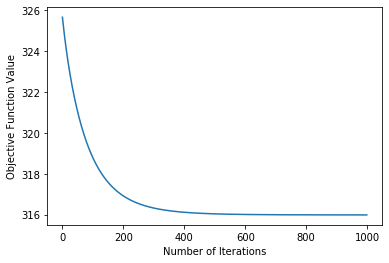

In [378]:
plt.plot(L_vals_Validation)
plt.xlabel('Number of Iterations')
plt.ylabel('Objective Function Value')

In [387]:
y_pred = sigmoid(X_validation @ beta_est_Validation)
result = np.where(y_pred <= 0.5, 0,1)
result

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [388]:
df_out['Survived'] = result

In [389]:
df_out

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [390]:
df_out.to_csv(data_dir + 'my_kaggle_submission.csv', index = False)

## Comments : 

1) A bigger learning rate is more effective, it helps the algorithm in converging much faster. 

2) Standardizing the dataset allowed the values to be calculated, without standardization my values were changing to 'inf' & 'nan' in the prediction function.